# TestCase 3

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from create_jsonfile import ask_user,read_config,check_config

# ask_user()
config = read_config(configfile="configs/config3.json")

### Configuration has been read from config.json ###
# dimension : 2
# testcase : 3
# version : new
# error_estimations : {'param_num': 1}
# gains : {'n_params': 50}


In [3]:
dimension = config["dimension"]
testcase = config["testcase"]
version = config["version"]  
largenet = False
if "largenet" in version:
    version = "medium" 
    largenet = True
# high_degree = 10

In [4]:
assert testcase == 3
check_config(config)

Config file is valid


## Imports + Load network

In [5]:
# export CUDA_VISIBLE_DEVICES=
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
from testcases.utils import create_tree

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
current_dir = os.getcwd()
repo_dir = os.path.dirname(current_dir)
repo_dir = os.path.dirname(repo_dir)
print(repo_dir)
# vérifier que repo_dir finit bien par "code" (à modifier pour l'utilisateur)
assert repo_dir.split("/")[-1] == "code"

/home/u2/lecourtier/Article1/code


In [8]:
if version != "new":
    from testcases.networks.test_2D.test_3.test_3_v1 import Run_laplacian2D,Poisson_2D
else:
    from testcases.networks.test_2D.test_3.test_3_v2 import Run_laplacian2D,Poisson_2D
from testcases.problem.problem_2D import TestCase3
problem = TestCase3(version=version)
from testcases.problem.problem_2D import TestCase3
problem = TestCase3(version=version)

Using device: cpu
torch loaded; device is cpu


>> load network /home/u2/lecourtier/Article1/code/networks/test_2D/test_fe3_new.pth
network loaded


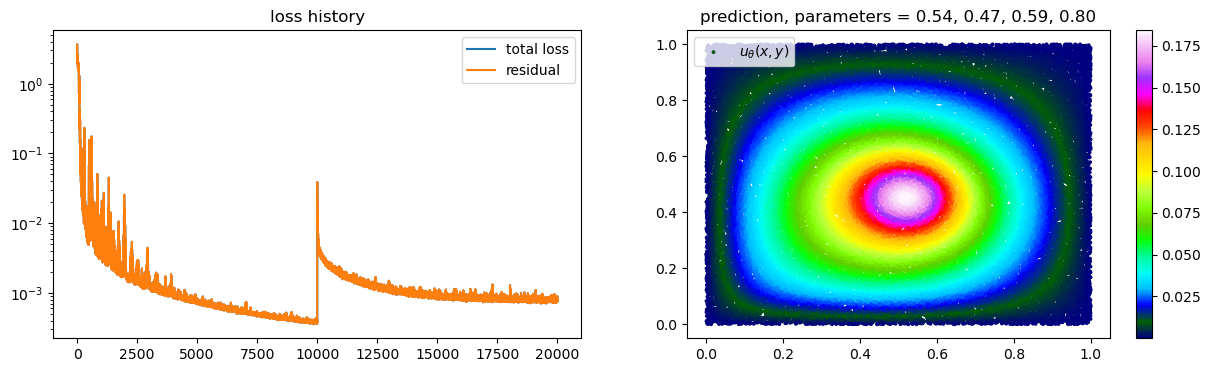

In [9]:
pde = Poisson_2D()
trainer,u_theta = Run_laplacian2D(pde)

## Error estimations

### Imports

In [10]:
from modfenics.error_estimations.error_estimations import ErrorEstimations
from modfenics.error_estimations.compare import CompareMethods

/home/u2/lecourtier/miniconda3/envs/fenics_scimba_modules/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [11]:
param_num = config["error_estimations"]["param_num"]     
error_estimations = ErrorEstimations(param_num, problem, repo_dir = repo_dir)
compare_methods = CompareMethods(error_estimations)
tab_nb_vert = error_estimations.tab_nb_vert

## Results directory: /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/


### Run FEM

In [12]:
degree = 1
df_FEM, tab_h_FEM, tab_err_FEM = error_estimations.run_fem_deg(degree,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree1.csv


## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree1.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree2.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree3.csv


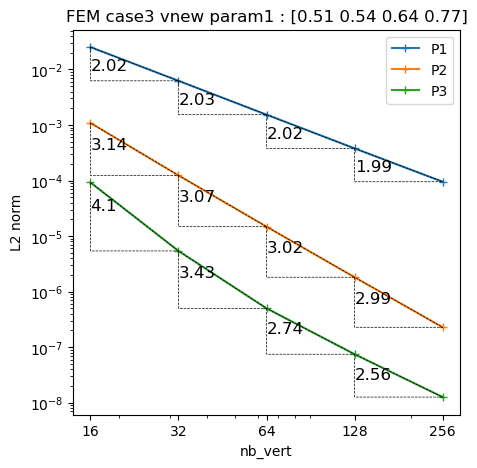

In [13]:
error_estimations.run_fem_alldeg(new_run=False,plot_cvg=True)

### Run Add

In [14]:
degree = 1
df_Corr, tab_h_Corr, tab_err_Corr = error_estimations.run_corr_deg(degree,u_theta,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Corr_case3_vnew_param1_degree1.csv


## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Corr_case3_vnew_param1_degree1.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Corr_case3_vnew_param1_degree2.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Corr_case3_vnew_param1_degree3.csv


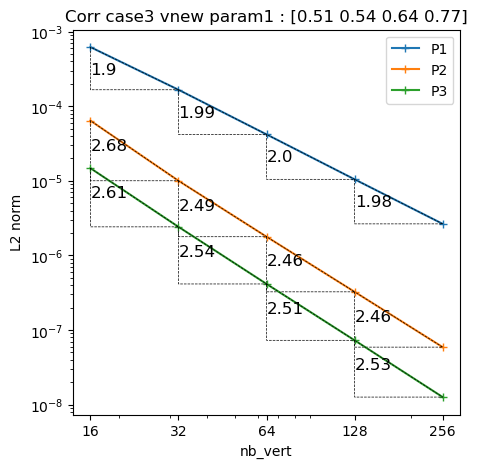

In [15]:
error_estimations.run_corr_alldeg(u_theta,new_run=False,plot_cvg=True)

### Run Mult

In [16]:
tab_M = [0.0,0.1,1.0,100.0]

In [17]:
degree = 1
error_estimations.run_mult_deg_allM(degree,u_theta,tab_M,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree1_M0.0.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree1_M0.1.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree1_M1.0.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree1_M100.0.csv


## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree1_M0.0.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree2_M0.0.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree3_M0.0.csv


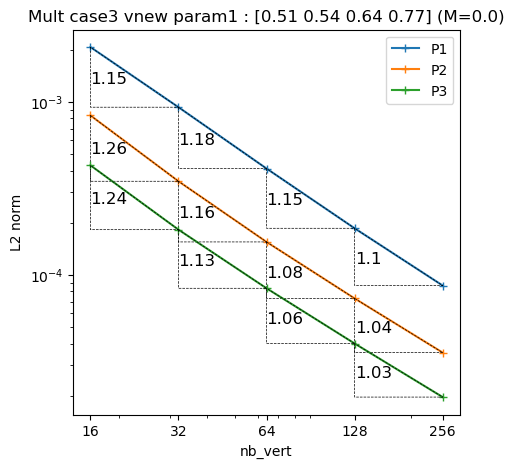

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree1_M0.1.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree2_M0.1.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree3_M0.1.csv


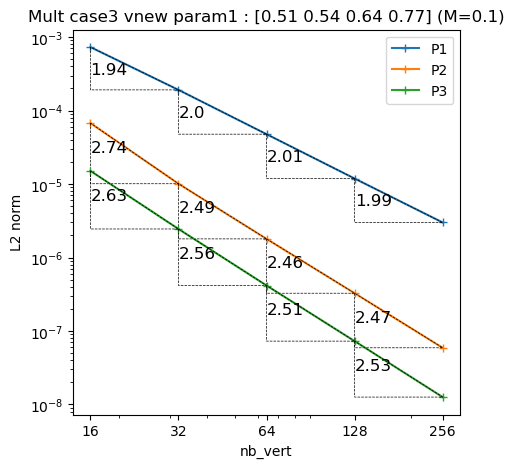

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree1_M1.0.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree2_M1.0.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree3_M1.0.csv


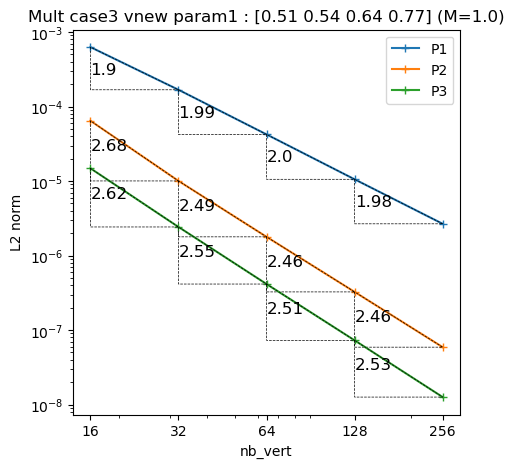

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree1_M100.0.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree2_M100.0.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree3_M100.0.csv


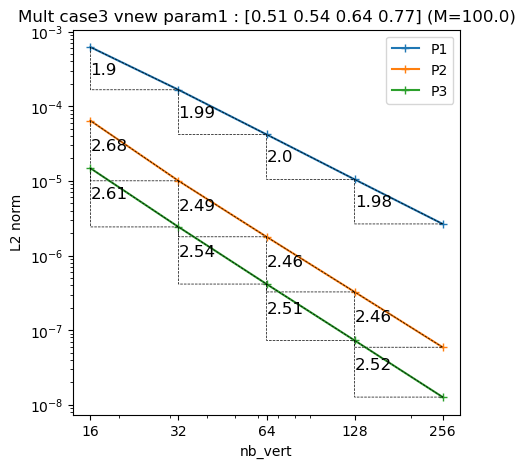

In [18]:
error_estimations.run_mult_alldeg_allM(u_theta,tab_M,new_run=False,plot_cvg=True)

### Save results

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree1.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree2.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree3.csv


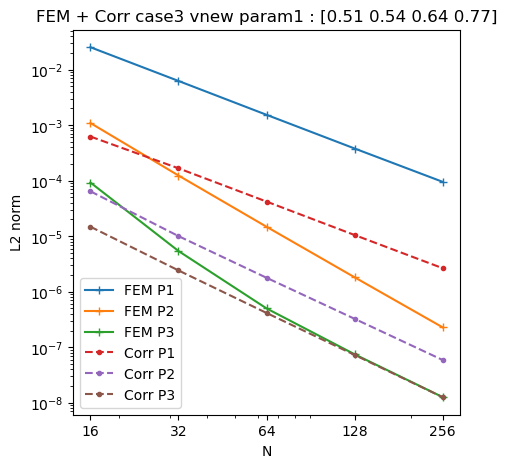

In [20]:
compare_methods.plot_Corr_vs_FEM_alldeg()

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree1.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree2.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree3.csv


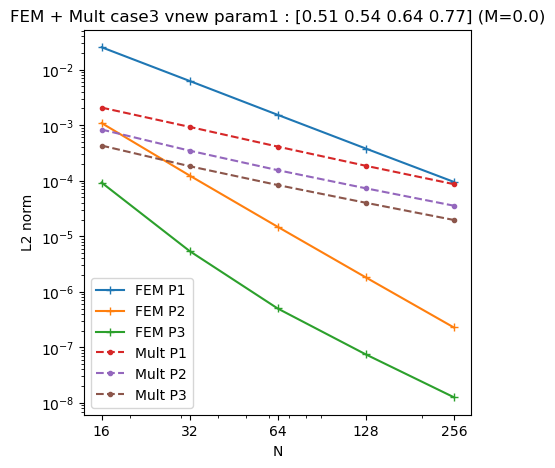

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree1.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree2.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree3.csv


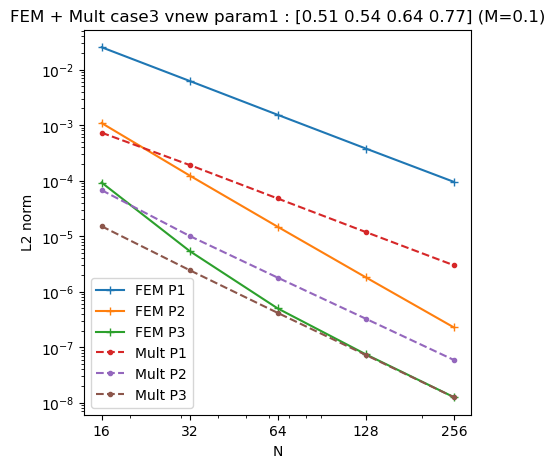

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree1.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree2.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree3.csv


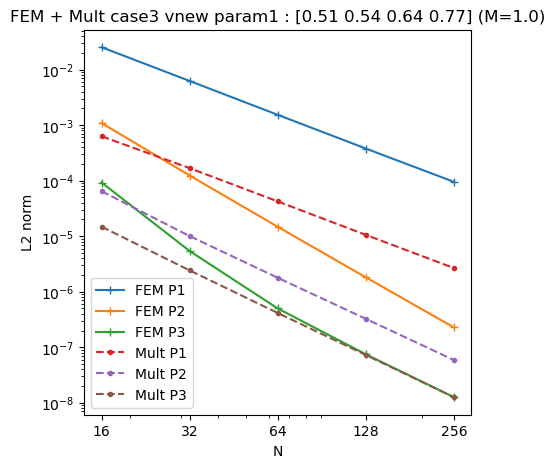

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree1.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree2.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree3.csv


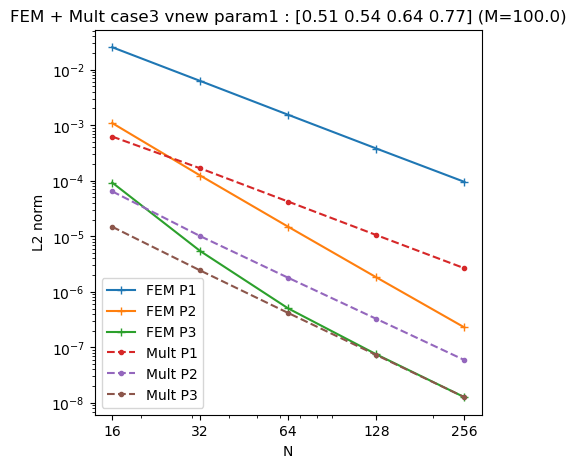

In [21]:
compare_methods.plot_Mult_vs_FEM_alldeg_allM(tab_M)

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree1_M0.0.csv
Mult weak P1 M0.0 not found
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree1_M0.1.csv
Mult weak P1 M0.1 not found
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree1_M1.0.csv
Mult weak P1 M1.0 not found
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree1_M100.0.csv
Mult weak P1 M100.0 not found


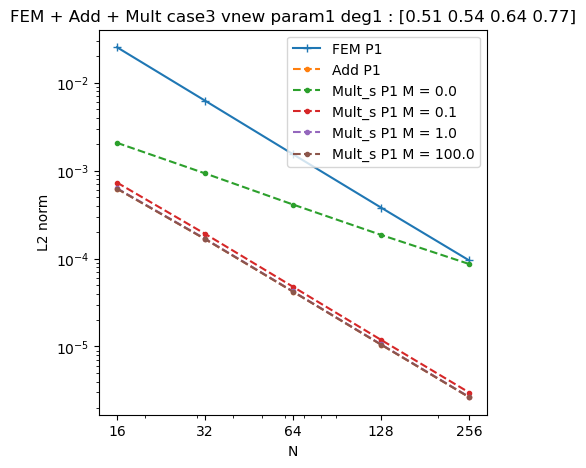

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree2_M0.0.csv
Mult weak P2 M0.0 not found
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree2_M0.1.csv
Mult weak P2 M0.1 not found
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree2_M1.0.csv
Mult weak P2 M1.0 not found
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree2_M100.0.csv
Mult weak P2 M100.0 not found


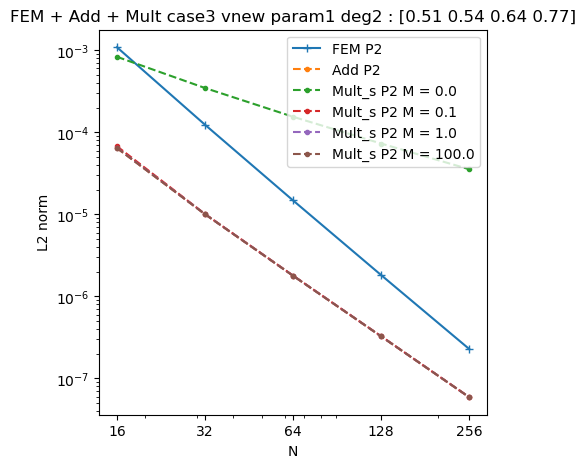

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree3_M0.0.csv
Mult weak P3 M0.0 not found
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree3_M0.1.csv
Mult weak P3 M0.1 not found
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree3_M1.0.csv
Mult weak P3 M1.0 not found
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree3_M100.0.csv
Mult weak P3 M100.0 not found


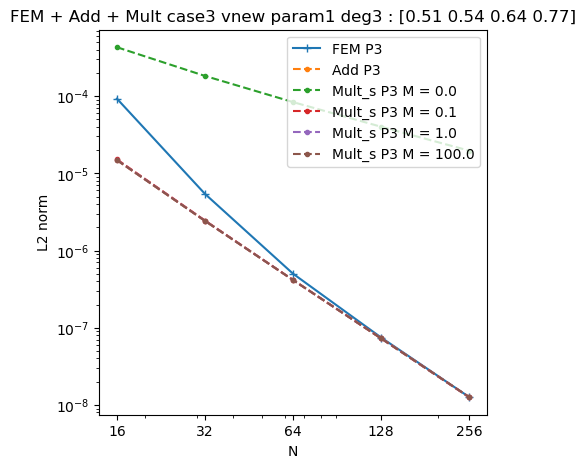

In [22]:
compare_methods.plot_Mult_vs_Add_vs_FEM_alldeg_allM(tab_M)

In [23]:
compare_methods.save_tab_alldeg_allM(tab_M)

Mult weak P1 M0.0 not found
Mult weak P1 M0.1 not found
Mult weak P1 M1.0 not found
Mult weak P1 M100.0 not found


/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:197: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')


Mult weak P2 M0.0 not found
Mult weak P2 M0.1 not found
Mult weak P2 M1.0 not found
Mult weak P2 M100.0 not found
Mult weak P3 M0.0 not found
Mult weak P3 M0.1 not found
Mult weak P3 M1.0 not found
Mult weak P3 M100.0 not found


/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:197: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:197: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')


## Gains

### Imports

In [48]:
from modfenics.gains.fem import compute_error_fem_deg,compute_error_fem_all
from modfenics.gains.pinns import compute_error_pinns_deg,compute_error_pinns_all
from modfenics.gains.add import compute_error_Corr_deg,compute_error_Corr_all
from modfenics.gains.compare import create_dataframes_deg,create_dataframes_all,save_stats_deg,save_stats_all

In [49]:
n_params = config["gains"]["n_params"]   
result_dir = testcase_dir + "/gains/"
create_tree(result_dir) 

### Run FEM

In [50]:
degree = 1
df_FEM, tab_nb_vert_FEM, tab_h_FEM, tab_err_FEM = compute_error_fem_deg(n_params,problem,degree,high_degree,new_run=False,result_dir=result_dir)

## Run gains with FEM for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0028284271247461927
Time to generate V_ex:  2.8617634773254395


AssertionError: 

In [ ]:
# compute_error_fem_all(n_params,problem,high_degree,new_run=False,result_dir=result_dir)

### Run PINNs

In [ ]:
degree = 1
df_PINNs, tab_nb_vert_PINNs, tab_h_PINNs, tab_err_PINNs = compute_error_pinns_deg(n_params,problem,degree,high_degree,u_theta,new_run=False,result_dir=result_dir)

## Read csv file /home/flecourtier/Bureau/Article1/code/results/fenics/test_2D/testcase1/version1/gains/PINNs_errors_case1_v1_degree1.csv


In [ ]:
# compute_error_pinns_all(n_params,problem,high_degree,u_theta,new_run=False,result_dir=result_dir)

### Run Add

In [ ]:
degree = 1
df_Corr, tab_nb_vert_Corr, tab_h_Corr, tab_err_Corr = compute_error_Corr_deg(n_params,problem,degree,high_degree,u_theta,new_run=False,result_dir=result_dir)

## Read csv file /home/flecourtier/Bureau/Article1/code/results/fenics/test_2D/testcase1/version1/gains/Corr_errors_case1_v1_degree1.csv


In [ ]:
# compute_error_Corr_all(n_params,problem,high_degree,u_theta,new_run=False,result_dir=result_dir)

### Compare methods

In [ ]:
degree = 1
df_errors,df_gains = create_dataframes_deg(n_params,problem,degree,result_dir=result_dir)

In [ ]:
# create_dataframes_all(n_params,problem,result_dir=result_dir)

In [ ]:
df_stats_Add = save_stats_deg(n_params,problem,degree,result_dir=result_dir)